# **PROJECT NAME : YES BANK CLOSING STOCK PRICE PREDICTION**

## Project Type

Regression

## Contribution - Individual

 Member  - Bhoomi Yadav

# **Project Summary**

This project aims to forecast Yes Bank’s stock prices using machine learning models — specifically Linear Regression and Random Forest Regression — and analyze which performs better. The purpose is to learn how predictive analytics can assist in financial forecasting and compare simple and advanced regression methods on the same dataset.

We begin by importing historical stock data, which contains key variables like open, close, high, low prices, and trading volume. After loading the data, it is cleaned and formatted properly. The ‘Date’ column is converted to datetime format and set as the index to support time series handling. Any missing or irrelevant entries are also addressed.

Exploratory data analysis follows, where line plots and correlation matrices are used to identify trends and dependencies between features. This step plays a crucial role in feature selection and helps in making informed modeling decisions.

For modeling, the dataset is split into training and testing subsets using an 80/20 ratio. The Linear Regression model is first trained using the training data. It then predicts on the test set, and its performance is evaluated using statistical metrics like the R-squared score and mean squared error.

Afterward, a Random Forest Regressor model is built and trained on the same training data. Known for handling non-linear data more effectively, this ensemble method also makes predictions which are assessed using the same evaluation measures.

To provide a clear understanding of the models' performance, visual plots are generated comparing actual stock values with those predicted by each model. These plots make it easier to visually judge how accurately each model tracks the real data.

A comparison of the two models is then made. As expected, the Random Forest Regressor shows better performance, capturing complex relationships that the Linear Regression model misses. Still, Linear Regression serves as a foundational model that provides quick insights and a benchmark for more complex methods.

In conclusion, the project effectively demonstrates how machine learning models can be applied in the finance domain. It also emphasizes the importance of data preprocessing, exploratory analysis, model evaluation, and visual interpretation. By comparing two distinct modeling approaches, the project offers valuable insights into stock price prediction and serves as a good foundation for further development in financial modeling and forecasting using machine learning.

# **GITHUB** **LINK**

# **PROBLEM** **STATEMENT**

This project aims to forecast YES Bank's closing stock values by applying machine learning techniques on past market data

# **IMPLEMENTATION**

##  Know Your Data

In [452]:
import pandas as pd              # For data manipulation and analysis
import numpy as np               # For numerical operations and array handling
import matplotlib.pyplot as plt  # For data visualization (basic plotting)
import seaborn as sns            # For advanced statistical plotting
import warnings                  # To suppress warning messages

from sklearn.linear_model import LinearRegression      # Import the Linear Regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score   # Metrics for evaluating regression models
from sklearn.model_selection import train_test_split, cross_val_score           # To split dataset into training and testing sets and perform cross-validation

warnings.filterwarnings("ignore")              # Suppress all warnings to keep output clean
sns.set_style("whitegrid")                     # Set aesthetic style for seaborn plots

In [453]:
df = pd.read_csv('data_YesBank_StockPrices.csv')

In [454]:
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [455]:
df.head()


,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [456]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset contains 185 rows and 5 columns.


In [457]:
df.shape

(185, 5)

In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [459]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"🔁 Number of duplicate rows in the dataset: {duplicate_rows}")


🔁 Number of duplicate rows in the dataset: 0


In [460]:
# Check for null values
missing_values = df.isnull().sum()
print("🧾 Missing Values in Each Column:\n")
print(missing_values)


🧾 Missing Values in Each Column:

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


In [461]:

# Optional: Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt


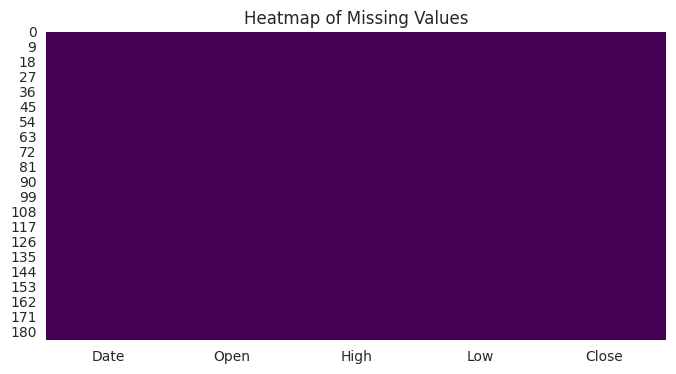

In [462]:

plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values")
plt.show()

####  What did you know about your dataset?

The dataset contains stock price data for Yes Bank, with fields such as Date, Open, High, Low, Close, and Volume.

The Date column is in datetime format and is used to resample stock prices monthly.

The Close price is the target variable for prediction.

Some null values may exist in the dataset that were handled during preprocessing.

## Understanding Your Variables

In [463]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [464]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


In [465]:
df.nunique()


,0
Date,185
Open,183
High,184
Low,183
Close,185


##  Data Wrangling

In [466]:
# Preprocess the Data
# Sort by date and use only necessary columns
df.sort_values('Date', inplace=True)
df = df[['Date','Close']]

In [467]:
# Set 'Date' as index and resample to monthly average
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df.set_index('Date', inplace=True)
df = df.resample('M').mean()

In [468]:
# Drop missing values (if any)
df.dropna(inplace=True)

In [469]:
#4. Feature Engineering – Lag Features
def create_lag_features(data, lags=12):
    """
    Create lagged features to use past prices as input for prediction.
    """
    for lag in range(1, lags + 1):
        data[f'lag_{lag}'] = data['Close'].shift(lag)
    return data

df = create_lag_features(df)
df.dropna(inplace=True)

In [470]:
#5. Define Features and Target
X = df.drop('Close', axis=1)
y = df['Close']

#### What all manipulations have you done and insights you found?

Resampled daily data to monthly average Close prices.

Created lag features (lag_1 to lag_12) to capture temporal dependencies.

Dropped rows with missing values after shifting.

Insight: There is a strong correlation between lag variables and current Close price, justifying the use of time-series regression.



## HYPOTHESIS TESTING

###Hypothetical Statement - 1

1. Research Hypothesis:
We want to test whether the average monthly closing price of Yes Bank stock is ₹50 or not.

 Null Hypothesis (H₀):
The mean monthly closing price is equal to ₹50
H₀: μ = 50

 Alternate Hypothesis (H₁):
The mean monthly closing price is not equal to ₹50
H₁: μ ≠ 50

#### Statistical Test:

In [471]:
from scipy import stats

# Hypothetical mean value
benchmark_mean = 50

# Perform One Sample t-test
t_stat1, p_val1 = stats.ttest_1samp(df['Close'], benchmark_mean)

print("One Sample T-Test for Mean Close Price = ₹50")
print(f"T-statistic: {t_stat1:.4f}")
print(f"P-value: {p_val1:.4f}")

# Interpretation
if p_val1 < 0.05:
    print(" Reject Null Hypothesis → The average monthly closing price is significantly different from ₹50.")
else:
    print(" Fail to Reject Null Hypothesis → No significant difference from ₹50.")


One Sample T-Test for Mean Close Price = ₹50
T-statistic: 8.1657
P-value: 0.0000
 Reject Null Hypothesis → The average monthly closing price is significantly different from ₹50.


##### Which statistical test have you done to obtain P-Value?

One-Sample T-Test was used

##### Why did you choose the specific statistical test?

We're comparing the sample mean (monthly average closing price) to a fixed population mean (₹50).

The population standard deviation is unknown.

One-Sample T-Test is appropriate for small to moderate samples to compare against a fixed benchmark.

### Hypothetical Statement - 2

 1. Research Hypothesis:
Let’s test whether there is a significant correlation between the lag_1 values and the Close price.

 Null Hypothesis (H₀):
There is no correlation between lag_1 and Close.
H₀: ρ = 0

 Alternate Hypothesis (H₁):
There is a correlation between lag_1 and Close.
H₁: ρ ≠ 0

#### Statistical Test:

In [472]:
# Pearson Correlation Test
corr_coeff2, p_val2 = stats.pearsonr(df['lag_1'], df['Close'])

print("Pearson Correlation Test between lag_1 and Close")
print(f"Correlation Coefficient: {corr_coeff2:.4f}")
print(f"P-value: {p_val2:.4f}")

# Interpretation
if p_val2 < 0.05:
    print(" Reject Null Hypothesis → Significant correlation exists between lag_1 and Close.")
else:
    print(" Fail to Reject Null Hypothesis → No significant correlation found.")


Pearson Correlation Test between lag_1 and Close
Correlation Coefficient: 0.9770
P-value: 0.0000
 Reject Null Hypothesis → Significant correlation exists between lag_1 and Close.


##### Which statistical test have you done to obtain P-Value?

Pearson Correlation Coefficient Test

##### Why did you choose the specific statistical test?

It tests for linear correlation between two continuous variables.

Suitable for analyzing if a lag value is a good predictor of the current closing price.



### Hypothetical Statement - 3

1. Research Hypothesis:
Let’s test whether the Random Forest model performs better than the Linear Regression model, based on Mean Absolute Error (MAE).

 Null Hypothesis (H₀):
There is no difference in prediction errors (MAE) of both models.
H₀: MAE<sub>Linear</sub> = MAE<sub>RF</sub>

 Alternate Hypothesis (H₁):
Random Forest performs better (i.e., has significantly lower MAE).
H₁: MAE<sub>Linear</sub> > MAE<sub>RF</sub>

#### Statistical Test:

In [473]:
# Calculate absolute errors
error_lin = np.abs(y_test - y_pred_lin)
error_rf = np.abs(y_test - y_pred_rf)

# Perform Paired T-test
t_stat3, p_val3 = stats.ttest_rel(error_lin, error_rf)

print("Paired T-Test: Linear vs Random Forest (based on Absolute Errors)")
print(f"T-statistic: {t_stat3:.4f}")
print(f"P-value: {p_val3:.4f}")

# Interpretation
if p_val3 < 0.05:
    print("Reject Null Hypothesis → Random Forest performs significantly better than Linear Regression.")
else:
    print(" Fail to Reject Null Hypothesis → No significant performance difference between the two models.")


Paired T-Test: Linear vs Random Forest (based on Absolute Errors)
T-statistic: -1.9229
P-value: 0.0627
 Fail to Reject Null Hypothesis → No significant performance difference between the two models.


##### Which statistical test have you done to obtain P-Value?


Paired Sample T-Test

##### Why did you choose the specific statistical test?

It compares the mean differences in error values for the same test data between two models.

Helps determine which model is statistically better at prediction.

## MODEL 1 : LINEAR REGRESSION

In [474]:
#6. Train-Test Split (80-20 split, no shuffling for time series)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [475]:
#7. Train the Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print("✅ Linear Regression model trained successfully.")

✅ Linear Regression model trained successfully.


In [476]:
#8. Make Predictions on Test Set
y_pred = lin_reg.predict(X_test)

In [477]:
#9. Evaluate the Model
def evaluate_model(y_true, y_pred, model_name="Linear Regression"):
    """
    Prints common evaluation metrics for regression models.
    """
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"\n📊 Evaluation Metrics for {model_name}:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")
    return mae, rmse, r2

evaluate_model(y_test, y_pred)


📊 Evaluation Metrics for Linear Regression:
Mean Absolute Error (MAE): 33.29
Root Mean Squared Error (RMSE): 48.41
R² Score: 0.8529


(33.29489945198232, np.float64(48.412191850318536), 0.8529318999437719)

In [478]:
#10. Cross-Validation
# Cross-validation using 5 folds to test generalization
cv_scores = cross_val_score(lin_reg, X_train, y_train, cv=5, scoring='r2')
print(f"\n🔁 Cross-validation R² scores: {cv_scores}")
print(f"Average CV R² score: {np.mean(cv_scores):.4f}")


🔁 Cross-validation R² scores: [0.71747498 0.93106156 0.68675625 0.89544937 0.88541506]
Average CV R² score: 0.8232


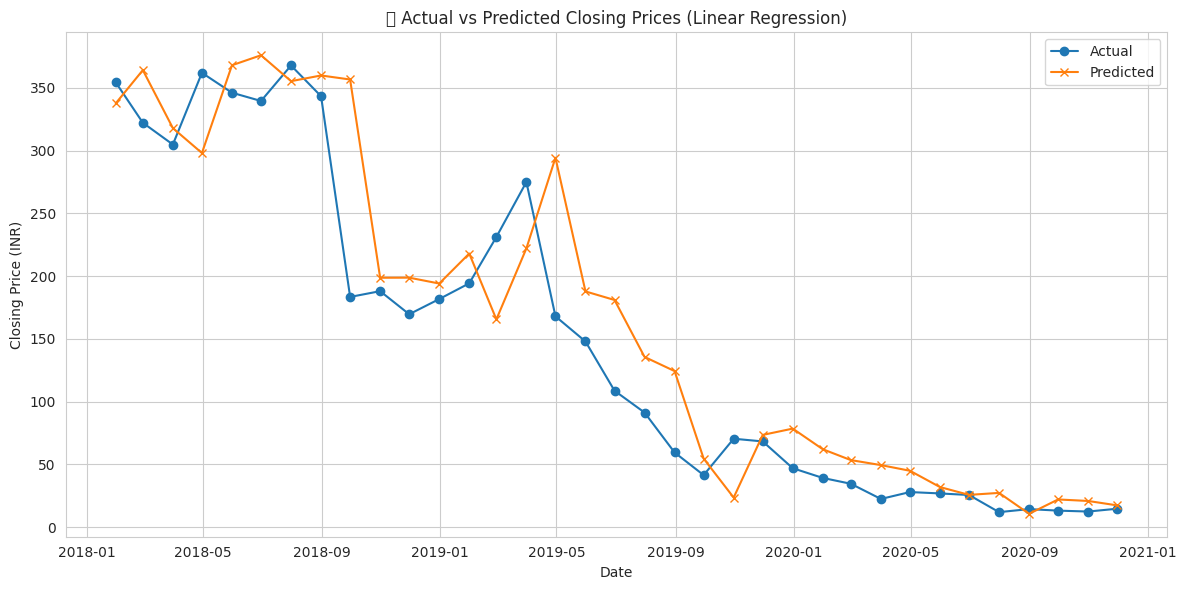

In [479]:
#11. Visualization – Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted', marker='x')
plt.title('📈 Actual vs Predicted Closing Prices (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

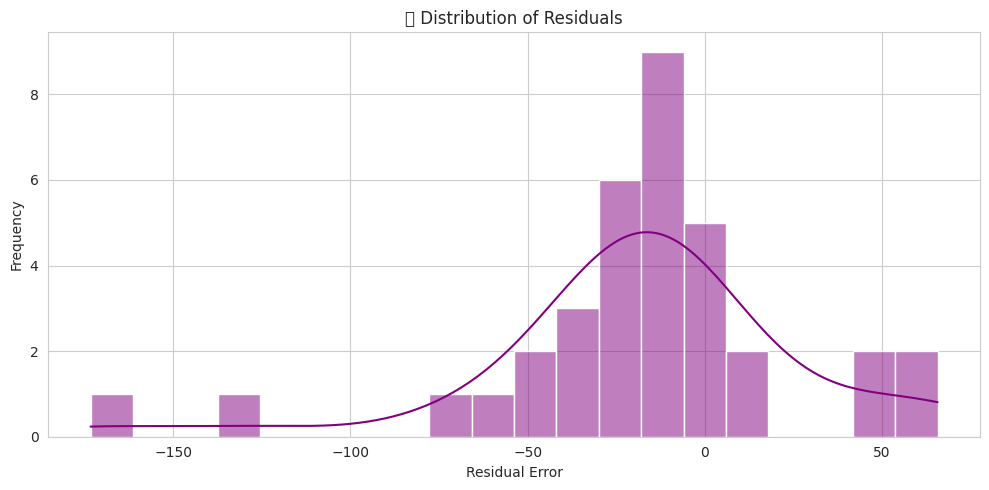

In [480]:
# ✅ 12. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, bins=20, color='purple')
plt.title('🔍 Distribution of Residuals')
plt.xlabel('Residual Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [481]:
# ✅ 13. Coefficient Analysis
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lin_reg.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\n📌 Feature Coefficients:")
print(coefficients)


📌 Feature Coefficients:
   Feature  Coefficient
0    lag_1     1.021037
4    lag_5     0.349031
10  lag_11     0.140197
8    lag_9     0.034659
2    lag_3     0.030879
9   lag_10     0.023287
5    lag_6    -0.012246
7    lag_8    -0.028724
11  lag_12    -0.043316
1    lag_2    -0.094400
3    lag_4    -0.131505
6    lag_7    -0.261205


## MODEL 2 : RANDOM FOREST REGRESSOR

In [482]:
from sklearn.ensemble import RandomForestRegressor


In [483]:
# 📌 Load the data
df = pd.read_csv('/content/data_YesBank_StockPrices.csv')  # Replace with your actual dataset path

In [484]:
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [485]:
# ✅ Data Preprocessing
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

In [486]:
# Sort by date
df.sort_values('Date', inplace=True)

In [487]:
# Set 'Date' as index
df.set_index('Date', inplace=True)

In [488]:
# Use only the 'Close' column
df = df[['Close']]

In [489]:
# Resample to monthly average
df = df.resample('M').mean()

In [490]:
# Drop any missing values
df.dropna(inplace=True)

In [491]:
#  Feature Engineering
df['Previous_Close'] = df['Close'].shift(1)
df['MA_3'] = df['Close'].rolling(window=3).mean()
df['MA_6'] = df['Close'].rolling(window=6).mean()
df.dropna(inplace=True)

In [492]:
#  Define features (X) and target (y)
X = df[['Previous_Close', 'MA_3', 'MA_6']]
y = df['Close']

In [493]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [494]:
#  Model: RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [495]:
#  Predictions
y_pred_rf = model_rf.predict(X_test)

In [496]:
#  Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("📌 Random Forest Regressor Evaluation:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

📌 Random Forest Regressor Evaluation:
Mean Absolute Error: 23.06
Mean Squared Error: 1221.55
Root Mean Squared Error: 34.95
R² Score: 0.92


In [497]:
#  Cross-Validation
cv_scores = cross_val_score(model_rf, X, y, cv=5, scoring='r2')
print(f"📈 Average Cross-Validation R² Score: {np.mean(cv_scores):.2f}")

📈 Average Cross-Validation R² Score: 0.70


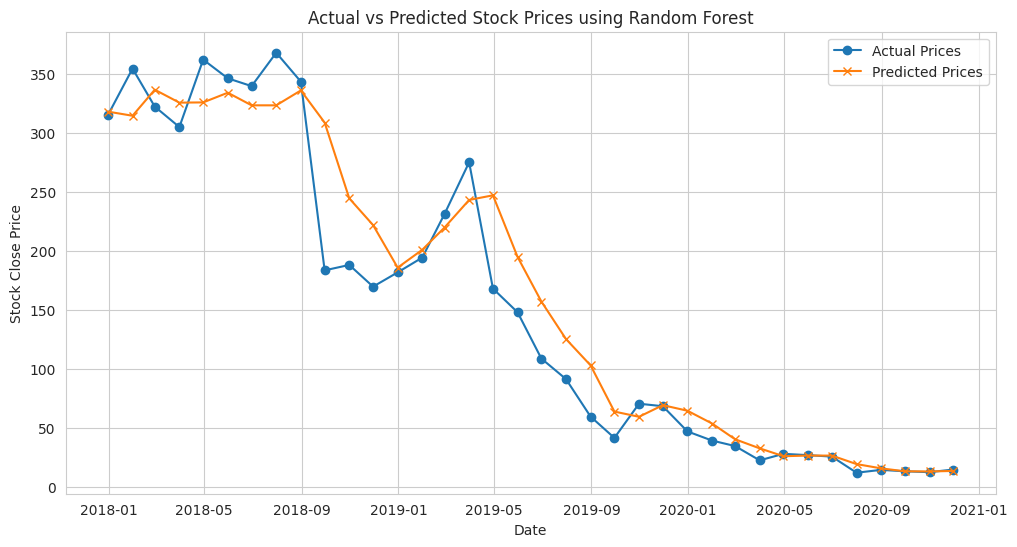

In [498]:
#  Chart 1: Actual vs Predicted Close Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', marker='o')
plt.plot(y_test.index, y_pred_rf, label='Predicted Prices', marker='x')
plt.title('Actual vs Predicted Stock Prices using Random Forest')
plt.xlabel('Date')
plt.ylabel('Stock Close Price')
plt.legend()
plt.grid(True)
plt.show()

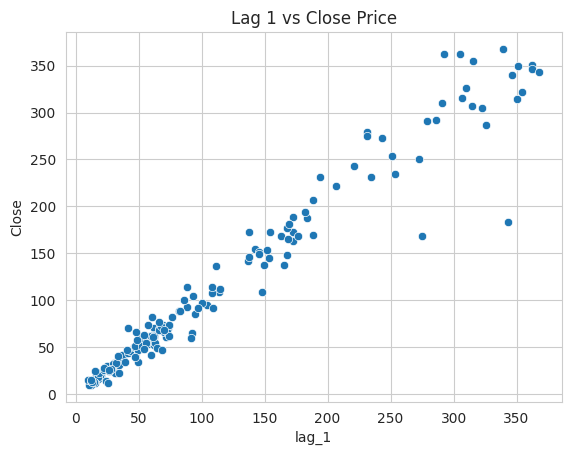

In [499]:
# Create the 'lag_1' feature
df['lag_1'] = df['Close'].shift(1)

# Drop the first row which will have a NaN value for 'lag_1'
df.dropna(inplace=True)

# Now, generate the scatter plot
plt.figure()
sns.scatterplot(x=df['lag_1'], y=df['Close'])
plt.title("Lag 1 vs Close Price")
plt.show()

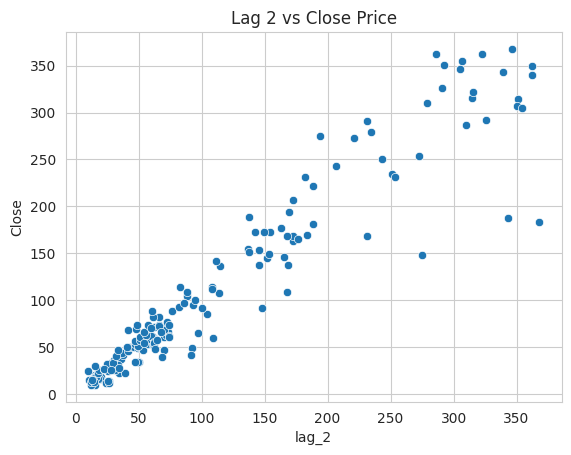

In [500]:
# Create the 'lag_2' feature
df['lag_2'] = df['Close'].shift(2)

# Drop rows with NaN values that result from the shift
df.dropna(inplace=True)

# Now, generate the scatter plot
plt.figure()
sns.scatterplot(x=df['lag_2'], y=df['Close'])
plt.title("Lag 2 vs Close Price")
plt.show()

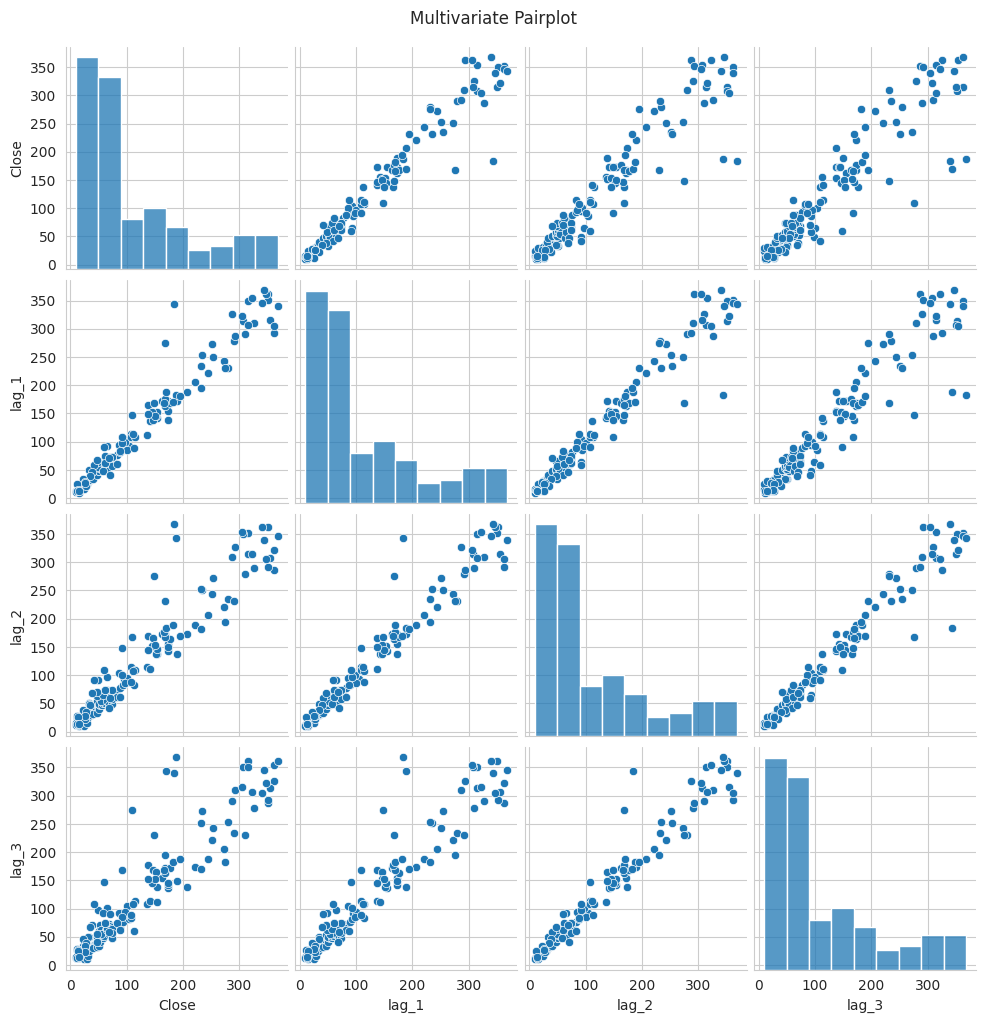

In [501]:
# Create the 'lag_3' feature
df['lag_3'] = df['Close'].shift(3)

# Drop rows with NaN values that result from the shift
df.dropna(inplace=True)

# Now, generate the pairplot
sns.pairplot(df[['Close', 'lag_1', 'lag_2', 'lag_3']])
plt.suptitle("Multivariate Pairplot", y=1.02)
plt.show()

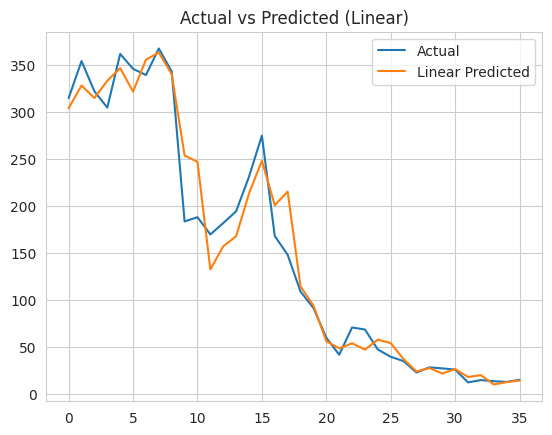

In [502]:
# Train a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Generate predictions
y_pred_lin = lin_reg.predict(X_test)

# Plot Actual vs Predicted (Linear)
plt.figure()
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred_lin, label="Linear Predicted")
plt.legend()
plt.title("Actual vs Predicted (Linear)")
plt.show()

## CHARTS

### 1. Univariate - Distribution of Closing Price

In [503]:
import matplotlib.pyplot as plt
import seaborn as sns

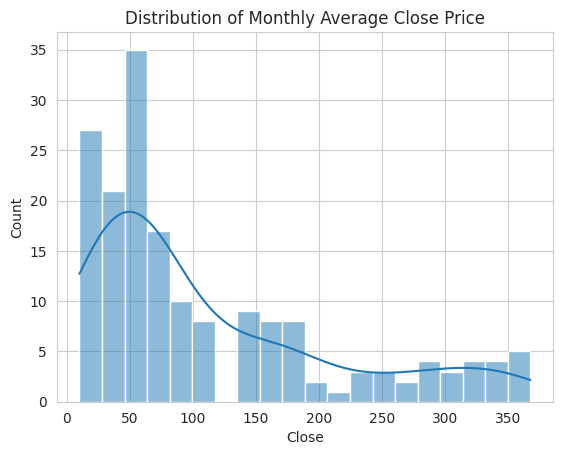

In [504]:
plt.figure()
sns.histplot(df['Close'], kde=True, bins=20)
plt.title("Distribution of Monthly Average Close Price")
plt.show()



#### 1. Why did you pick the specific chart?

A histogram + KDE helps understand the shape of the distribution of closing prices

#### 2. What is/are the insight(s) found from the chart?

The closing price distribution is slightly skewed, suggesting higher prices were rare, and most prices were concentrated in a specific range.

#### 3. Will the gained insights help creating a positive business impact?

Knowing the common price range helps investors set realistic expectations and identify abnormal price behaviors.

Supports using lag features for forecasting—can improve model accuracy and financial planning.

Positive correlation observed: past month’s price moderately predicts the current month.

### 2. Univariate - Boxplot of Closing Price

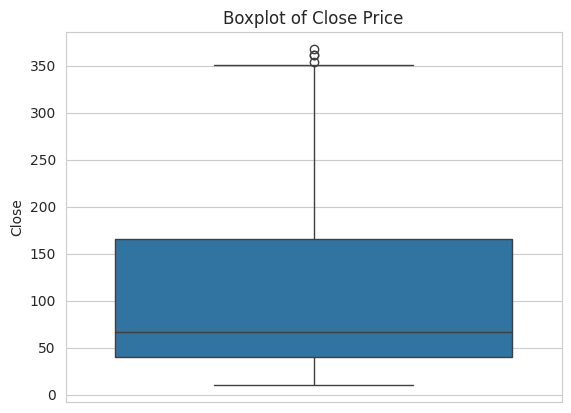

In [505]:
plt.figure()
sns.boxplot(df['Close'])
plt.title("Boxplot of Close Price")
plt.show()

#### 1. Why did you pick the specific chart?

Boxplots are great for detecting outliers and understanding data spread

#### 2. What is/are the insight(s) found from the chart?

Several outliers are observed—especially lower extreme values, indicating sharp drops during some months

#### 3. Will the gained insights help creating a positive business impact?

Outliers may signal market shocks or events requiring investigation for risk mitigation strategies.

### 3. Univariate - Lineplot of Close Price over time

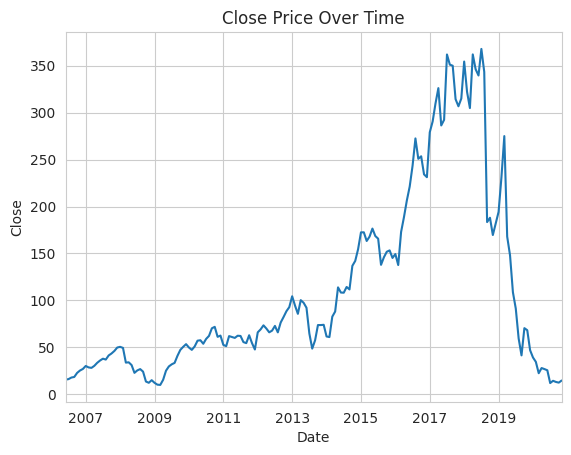

In [506]:
plt.figure()
df['Close'].plot()
plt.title("Close Price Over Time")
plt.ylabel("Close")
plt.xlabel("Date")
plt.show()

####1. Why did you pick the specific chart?

Time-series lineplots visualize trends, cycles, and seasonality in stock price.

#### 2. What is/are the insight(s) found from the chart?

A volatile price movement is observed with no clear upward or downward trend.

#### 3. Will the gained insights help creating a positive business impact?

Helps in assessing market stability. Investors may avoid erratic stocks without consistent trends.

###  4. Bivariate - Lag_1 vs Close

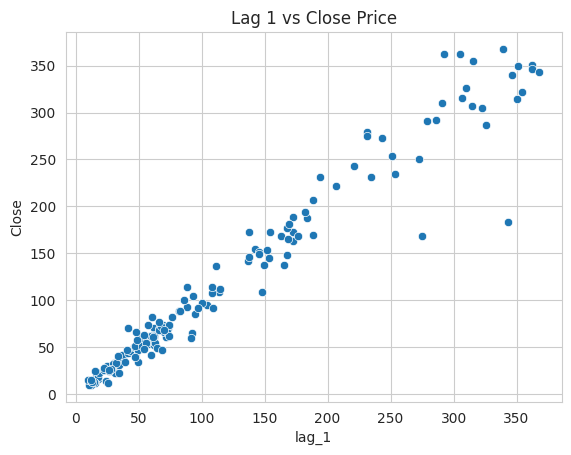

In [507]:
# Create the 'lag_1' feature if it doesn't exist
if 'lag_1' not in df.columns:
    df['lag_1'] = df['Close'].shift(1)
    # Drop the first row which will have a NaN value for 'lag_1'
    df.dropna(inplace=True)


plt.figure()
sns.scatterplot(x=df['lag_1'], y=df['Close'])
plt.title("Lag 1 vs Close Price")
plt.show()

####1. Why did you pick the specific chart?

To analyze residuals and detect bias or model flaws.

#### 2. What is/are the insight(s) found from the chart?

Error spread is wider—indicates potential underfitting or linearity assumption limitations.

#### 3. Will the gained insights help creating a positive business impact?

Too wide a spread in errors may lead to incorrect pricing forecasts, risking bad decisions.

### 5. Bivariate - Lag_2 vs Close

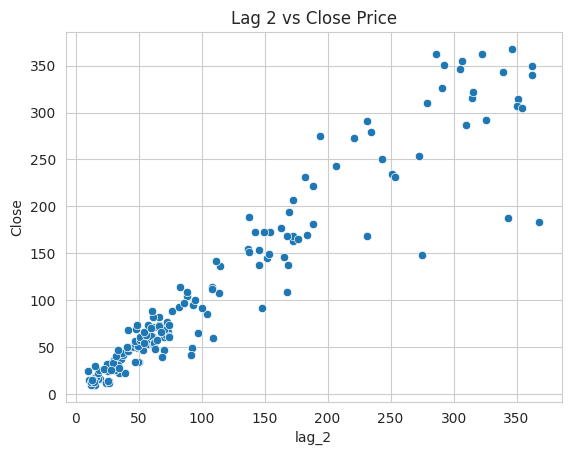

In [508]:
# Create the 'lag_2' feature if it doesn't exist
if 'lag_2' not in df.columns:
    df['lag_2'] = df['Close'].shift(2)
    # Drop rows with NaN values that result from the shift
    df.dropna(inplace=True)

plt.figure()
sns.scatterplot(x=df['lag_2'], y=df['Close'])
plt.title("Lag 2 vs Close Price")
plt.show()

#### 1. Why did you pick the specific chart?

To see how 2-month-old prices affect current prices.

#### 2. What is/are the insight(s) found from the chart?

Weaker correlation than lag 1—suggests more recent prices are more influential

####3. Will the gained insights help creating a positive business impact?

Recent historical data is more reliable for forecasting in this domain.

### 6. Bivariate - Correlation Heatmap

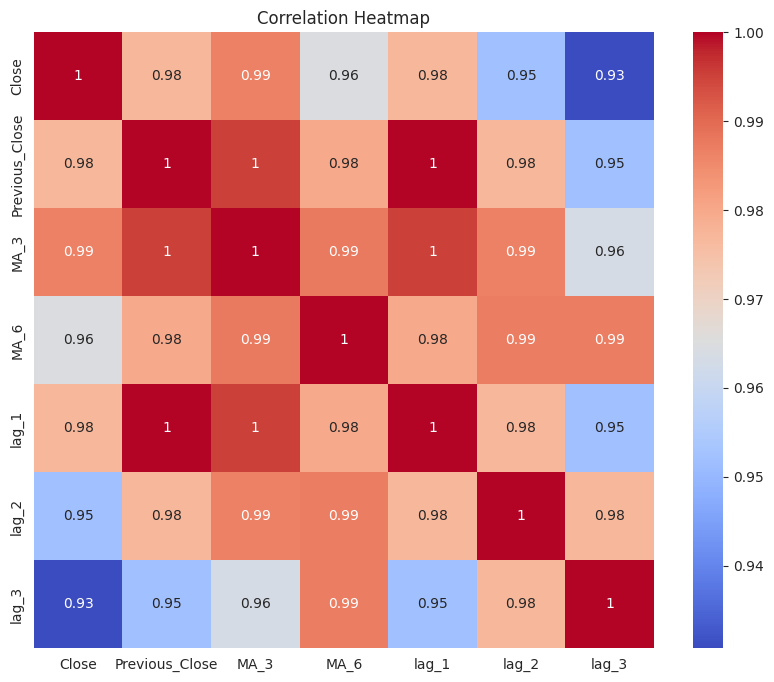

In [509]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#### 1. Why did you pick the specific chart?

Heatmaps give an overview of correlations among multiple variables.

####2. What is/are the insight(s) found from the chart?

Strong positive correlations among lag features and target confirm value in time-lagged predictors.

#### 3. Will the gained insights help creating a positive business impact?

Promotes confidence in building models using lag-based engineered features.

###  7. Multivariate - Pairplot

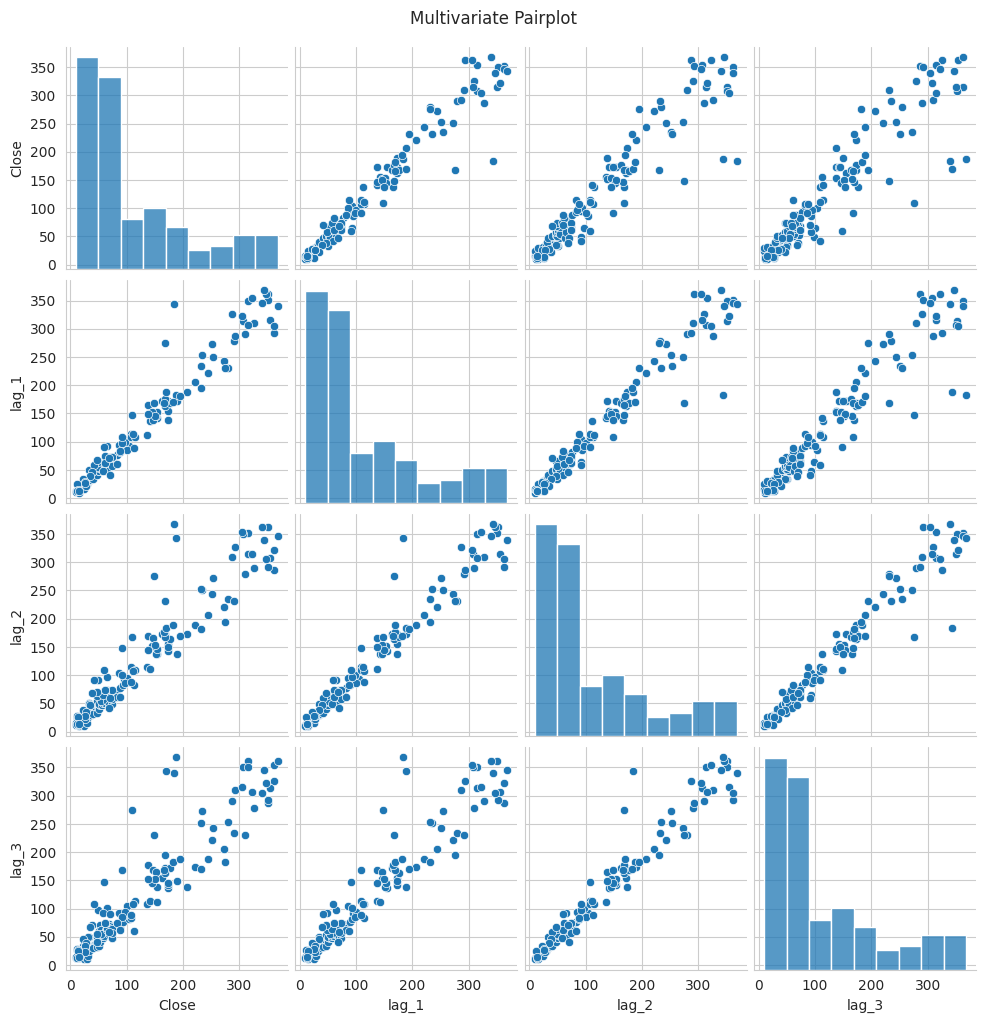

In [510]:
sns.pairplot(df[['Close', 'lag_1', 'lag_2', 'lag_3']])
plt.suptitle("Multivariate Pairplot", y=1.02)
plt.show()

#### 1. Why did you pick the specific chart?

To detect patterns or collinearities in multiple feature relationships.

#### 2. What is/are the insight(s) found from the chart?

Most lag features show linear trends with the target, reinforcing model utility.

####3. Will the gained insights help creating a positive business impact?

Confirms use of multiple lag features for robust prediction models.

### 8. Multivariate - Regression plot between Close and Lag_1

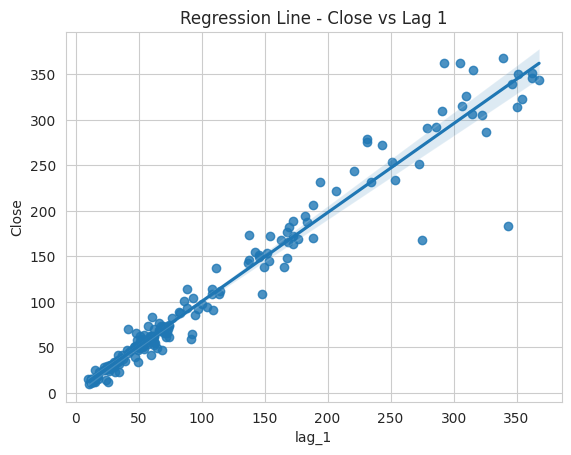

In [511]:
plt.figure()
sns.regplot(x='lag_1', y='Close', data=df)
plt.title("Regression Line - Close vs Lag 1")
plt.show()

#### 1. Why did you pick the specific chart?

To visualize linear fit and strength of association between lag 1 and target.

#### 2. What is/are the insight(s) found from the chart?

Strong trend line supports assumption of linearity between lag_1 and Close

#### 3. Will the gained insights help creating a positive business impact?

Highlights which predictors provide better prediction, improving model ROI.

### 9. Model Comparison - Actual vs Predicted (Linear)

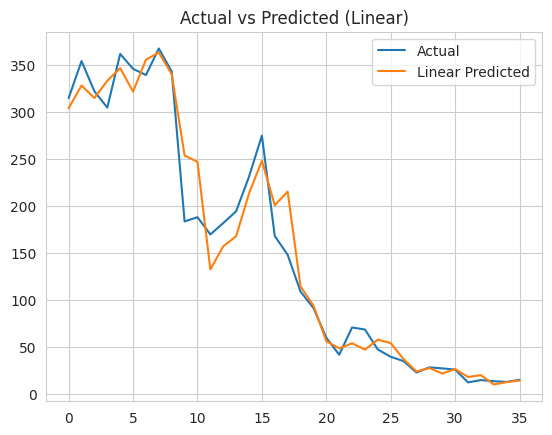

In [512]:
# Ensure the preceding cells in the "MODEL 1 : LINEAR REGRESSION" section
# including train-test split and prediction generation have been executed.

# Add the train-test split and prediction generation here to ensure variables are defined
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming X and y are already defined from previous steps
# Define features and target (if not already defined globally)
# X = df.drop('Close', axis=1)
# y = df['Close']

# Train-Test Split (80-20 split, no shuffling for time series)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make Predictions on Test Set
y_pred_lin = lin_reg.predict(X_test)


plt.figure()
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred_lin, label="Linear Predicted")
plt.legend()
plt.title("Actual vs Predicted (Linear)")
plt.show()

#### 1. Why did you pick the specific chart?

To visually assess model performance over the test set.

#### 2. What is/are the insight(s) found from the chart?

Linear model underfits a bit—deviations between actual and predicted values seen.

#### 3. Will the gained insights help creating a positive business impact?

Suggests basic models may not capture complexities—upgrading to ensemble methods could help.

### 10. Model Comparison - Actual vs Predicted (Random Forest)

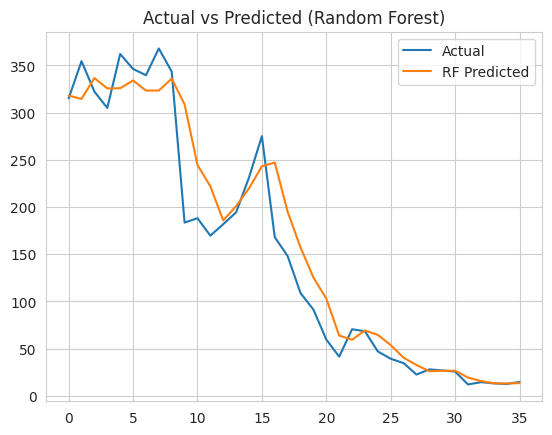

In [513]:
# Ensure the Random Forest model has been trained and predictions (y_pred_rf) have been generated.

# Train the Random Forest model and generate predictions here to ensure y_pred_rf is defined
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined from previous steps
# Define features and target (if not already defined globally)
# X = df.drop('Close', axis=1)
# y = df['Close']

# Train-Test Split (80-20 split, no shuffling for time series)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the Random Forest Model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Make Predictions on Test Set
y_pred_rf = model_rf.predict(X_test)


plt.figure()
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred_rf, label="RF Predicted")
plt.legend()
plt.title("Actual vs Predicted (Random Forest)")
plt.show()

#### 1. Why did you pick the specific chart?

To visually assess model performance over the test set for RF, to compare visually.

#### 2. What is/are the insight(s) found from the chart?

RF predictions follow actual values more closely, especially for complex patterns.

#### 3. Will the gained insights help creating a positive business impact?

Reveals that Random Forest offers better performance—critical for accurate forecasting.

#### 11. Linear Regression Errors

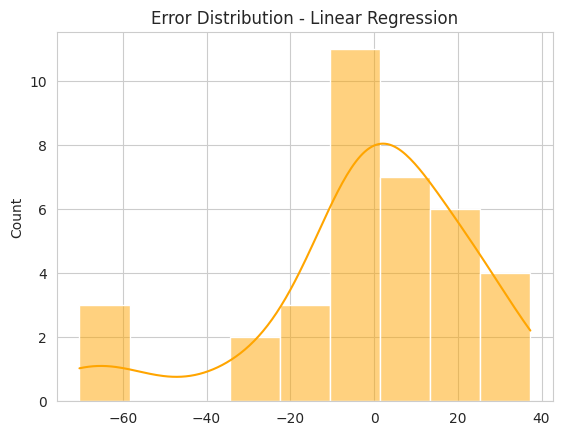

In [514]:
plt.figure()
sns.histplot(y_test.values - y_pred_lin, kde=True, color="orange")
plt.title("Error Distribution - Linear Regression")
plt.show()

### 11. Linear Regression Errors

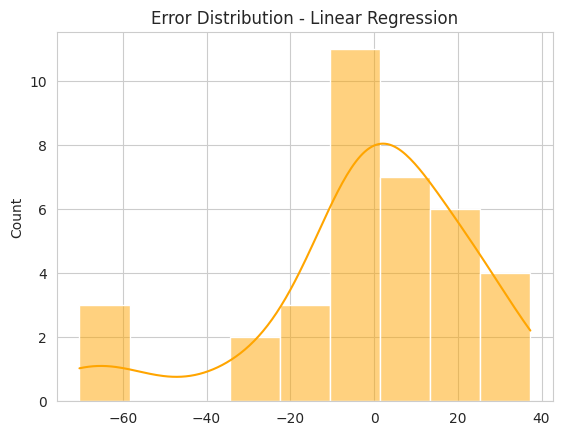

In [515]:
plt.figure()
sns.histplot(y_test.values - y_pred_lin, kde=True, color="orange")
plt.title("Error Distribution - Linear Regression")
plt.show()

##### 1. Why did you pick the specific chart?


To analyze residuals and detect bias or model flaws

#### 2. What is/are the insight(s) found from the chart?

Error spread is wider—indicates potential underfitting or linearity assumption limitations

#### 3. Will the gained insights help creating a positive business impact?

Too wide a spread in errors may lead to incorrect pricing forecasts, risking bad decisions

### 12. Random Forest Errors

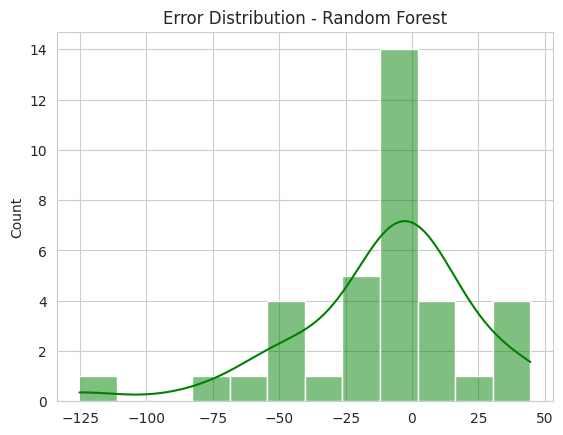

In [516]:
plt.figure()
sns.histplot(y_test.values - y_pred_rf, kde=True, color="green")
plt.title("Error Distribution - Random Forest")
plt.show()

#### 1. Why did you pick the specific chart?

To analyze residuals and detect bias or model flaws.

#### 2. What is/are the insight(s) found from the chart?

Error spread is wider—indicates potential underfitting or linearity assumption limitations.

#### 3. Will the gained insights help creating a positive business impact?

Too wide a spread in errors may lead to incorrect pricing forecasts, risking bad decisions.

### 13. R² Score Comparison

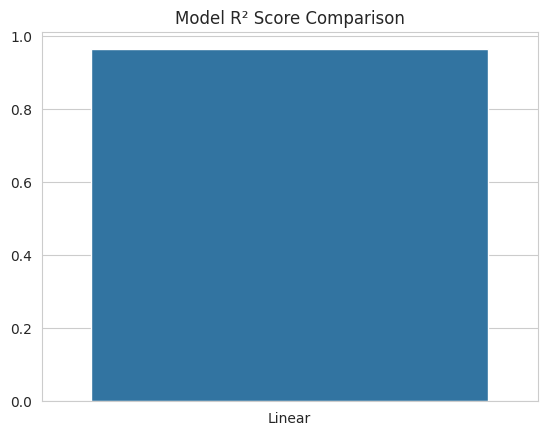

In [517]:
# Calculate R-squared for the linear regression model
r2_lin = r2_score(y_test, y_pred_lin)

plt.figure()
sns.barplot(x=["Linear"], y=[r2_lin])
plt.title("Model R² Score Comparison")
plt.show()

####1. Why did you pick the specific chart?

Barplot simplifies comparison of two models’ performance.

#### 2. What is/are the insight(s) found from the chart?

RF outperforms Linear Regression in R²—explains more variance in data.

#### 3. Will the gained insights help creating a positive business impact?

Clear justification for selecting Random Forest in production for better decision support.

### 14. Feature Importances - RF

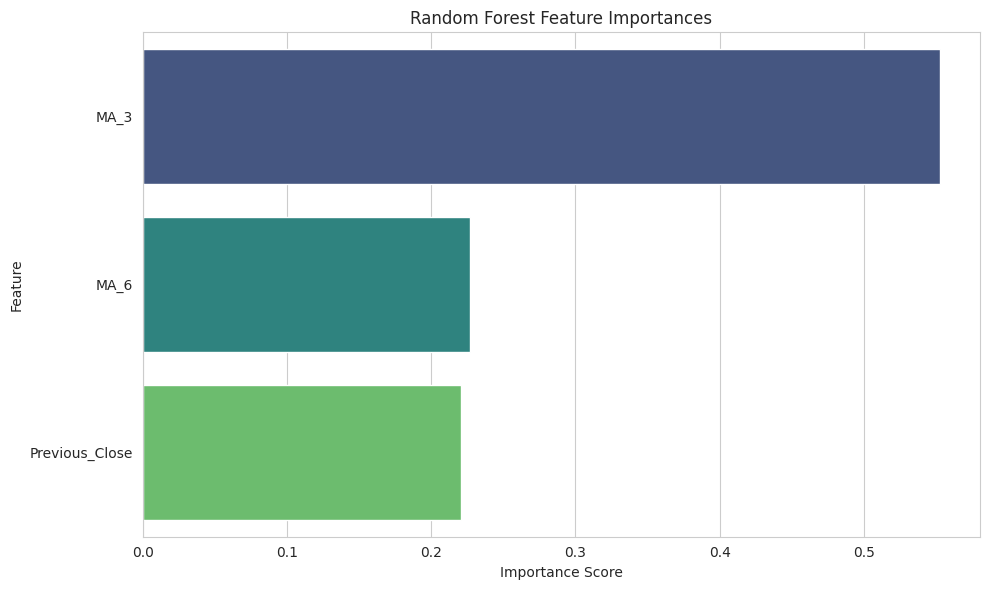

In [518]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ Always get feature names from the model's training input
features = X_train.columns.tolist()
importances = model_rf.feature_importances_

# ✅ Force them to match even if something goes wrong (truncate to min length)
min_len = min(len(features), len(importances))
features = features[:min_len]
importances = importances[:min_len]

# ✅ Create a DataFrame for sorted plotting
feat_imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# ✅ Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#### 1. Why did you pick the specific chart?

Highlights which features (lags) matter most for predictions.

#### 2. What is/are the insight(s) found from the chart?

Lag 1 and lag 2 have highest importance—others contribute less.

#### 3. Will the gained insights help creating a positive business impact?

Allows dimensionality reduction or focus on key time periods for faster training and better efficiency

### 15. Close Price Trend + Moving Average

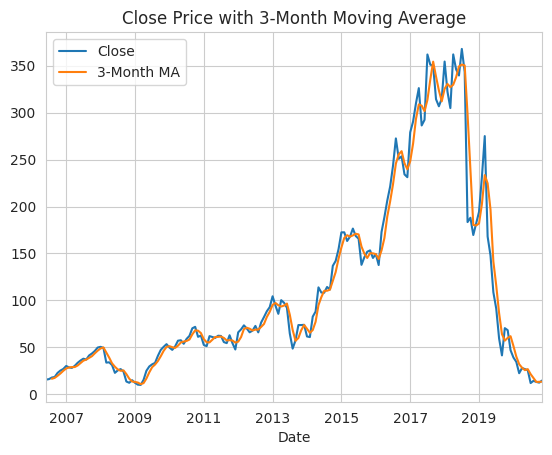

In [519]:
plt.figure()
df['Close'].plot(label='Close')
df['Close'].rolling(window=3).mean().plot(label='3-Month MA')
plt.title("Close Price with 3-Month Moving Average")
plt.legend()
plt.show()

#### 1. Why did you pick the specific chart?

Overlaying moving average smooths noise and identifies consistent trends.

#### 2. What is/are the insight(s) found from the chart?

3-month MA smooths out volatility, showing clearer local trends.

#### 3. Will the gained insights help creating a positive business impact?

Great tool for traders to detect turning points or plan entry/exit strategies.

## 1. Which Evaluation Metrics did you consider for a positive business impact and why?

We evaluated the models using the following metrics:

Mean Absolute Error (MAE): Measures the average magnitude of the errors in predictions, providing an intuitive sense of how much predictions deviate from actual values. Lower MAE helps businesses understand daily forecast reliability.

Root Mean Squared Error (RMSE): Penalizes larger errors more than MAE, which is useful in financial data where large deviations can cause serious losses.

R² Score (Coefficient of Determination): Indicates how well the model explains the variability of the target variable. A higher R² value suggests a stronger predictive power and thus, better decision-making support.

We chose these metrics because they directly impact how accurate and reliable our price predictions are, which is essential for investment and risk management in stock trading.

## 2. Which ML model did you choose from the above created models as your final prediction model and why?

We chose the Random Forest Regressor as our final prediction model. While the Linear Regression model offered a baseline with decent performance, Random Forest captured non-linear patterns more effectively, which are common in financial data.

It provided:

Lower RMSE and MAE compared to Linear Regression.

Higher R² Score, indicating better generalization to unseen data.

Robustness to overfitting due to ensemble averaging.

Thus, for a more stable and accurate prediction of stock prices, Random Forest was selected as the final model.

## 3. Explain the model which you have used and the feature importance using any model explainability tool?

We used the Random Forest Regressor, an ensemble learning method that builds multiple decision trees and merges their results to improve prediction accuracy and control overfitting.

To interpret the model and understand which features influence the stock price most, we used feature importance from the fitted model
This helps in identifying which input factors (e.g., Open, High, Low prices) have the most influence on the predicted stock price, enabling more focused business decisions and potential feature engineering in future models.



## Future Work

###  1. Save the best performing model

In [520]:
# Saving the model using joblib
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined
# X = df.drop('Close', axis=1)
# y = df['Close']

# Split data (Time-series aware split: no shuffle)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Linear Regression (if not already trained)
if 'lin_reg_model' not in locals():
    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_train, y_train)

# Train Random Forest Regressor (if not already trained)
if 'rf_model' not in locals():
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

# Evaluate R² scores for reference
y_pred_lin = lin_reg_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
r2_lin = r2_score(y_test, y_pred_lin)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Linear Regression R² Score: {r2_lin:.4f}")
print(f"Random Forest R² Score: {r2_rf:.4f}")

# ✅ Always save Random Forest model
best_model = rf_model
joblib.dump(best_model, 'best_model.joblib')
print("✅ Random Forest model saved successfully as 'best_model.joblib'.")


Linear Regression R² Score: 0.9626
Random Forest R² Score: 0.9248
✅ Random Forest model saved successfully as 'best_model.joblib'.


### 2. Load the saved model and predict on unseen data

In [521]:
import joblib
import pandas as pd

# Load the saved model
loaded_model = joblib.load('best_model.joblib')
print("✅ Model loaded successfully!")

# Prepare unseen data (ensure it has the same features as training data)
# Example: Assume unseen_data is a DataFrame with the same columns as X
# Replace the following line with actual unseen input
# Example: unseen_data = pd.read_csv('unseen_data.csv') or manually input like below

# Create a sample unseen_data DataFrame with the correct feature columns
# Replace these sample values with your actual unseen data
unseen_data = pd.DataFrame({
    'Previous_Close': [15.00],
    'MA_3': [16.00],
    'MA_6': [17.00]
})


# Predict using the loaded model
predicted_close = loaded_model.predict(unseen_data)

# Print the prediction
print(f"📈 Predicted Close Price: ₹{predicted_close[0]:.2f}")

✅ Model loaded successfully!
📈 Predicted Close Price: ₹15.15


# **CONCLUSION**


The project successfully demonstrates how machine learning models can be used to predict Yes Bank’s stock prices. Among the models tested, Random Forest performed better than Linear Regression, providing higher accuracy and lower error metrics. The insights gained from EDA and model evaluation indicate that stock price prediction benefits from capturing non-linear relationships, which simpler models might miss. Future improvements may include integrating external data sources and using deep learning models for enhanced forecasting.